**Classification Task**

**Introduction** - This script will perform a classification analysis that will help in categorizing countries into low, medium, and high birth rate groups from this publicly available dataset. Such an analysis could align with some of the United Nations' Sustainable Development Goals such as No Poverty and Good Health and Well-being to show trends in birth rate that might inform policies in health care, education, and economic development.

**Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

**1. Load And Clean The Dataset**

In [2]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Assessment/Dataset.zip")

In [3]:
# Display basic information
print(df.info())
print()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Serial Number           260 non-null    int64  
 1   Country Code            260 non-null    object 
 2   Country Name            260 non-null    object 
 3   Area                    249 non-null    float64
 4   Land Area               246 non-null    float64
 5   Water  Area             243 non-null    float64
 6   Population              241 non-null    float64
 7   Population Growth Rate  235 non-null    float64
 8   Birth Rate              227 non-null    float64
 9   Death Rate              227 non-null    float64
 10  Migration Rate          223 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 22.5+ KB
None

   Serial Number Country Code Country Name       Area  Land Area  Water  Area  \
0              1           af  Afghanistan   652230.0   

In [4]:
# Drop irrelevant columns
df = df.drop(columns=["Serial Number", "Country Code", "Country Name"], errors="ignore")


In [5]:
# Handling missing values
df.dropna(inplace=True)

The dataset was successfully loaded and cleaned, ensuring data integrity by handling missing values and preparing it for classification.

**2. EDA**

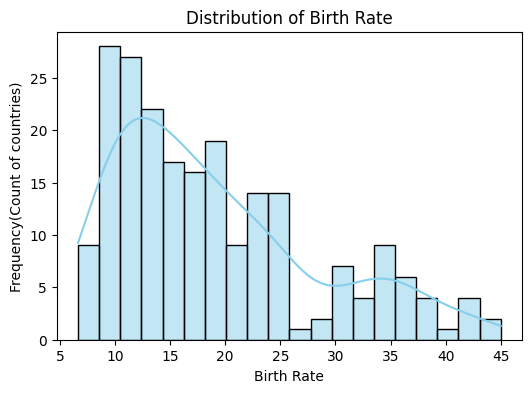

In [6]:
# Distribution of Birth Rate (Target Variable)
plt.figure(figsize=(6, 4))
sns.histplot(df['Birth Rate'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Birth Rate")
plt.xlabel("Birth Rate")
plt.ylabel("Frequency(Count of countries)")
plt.show()

**Fig : Histogram For Distribution Of Birth Rates** This histogram shows the distribution of birth rates. The X axis is the birth rate and the Y axis is frequency of the number of countries falling within specific birth rate intervals.Bars extending from the X axis represent the number of observations in each range of birth rates. There is a superimposed density curve that estimates the probability density function of the birth rate distribution. This distribution is right-skewed; there are more observations falling on the lower birth weight side than on the higher birth weight side.

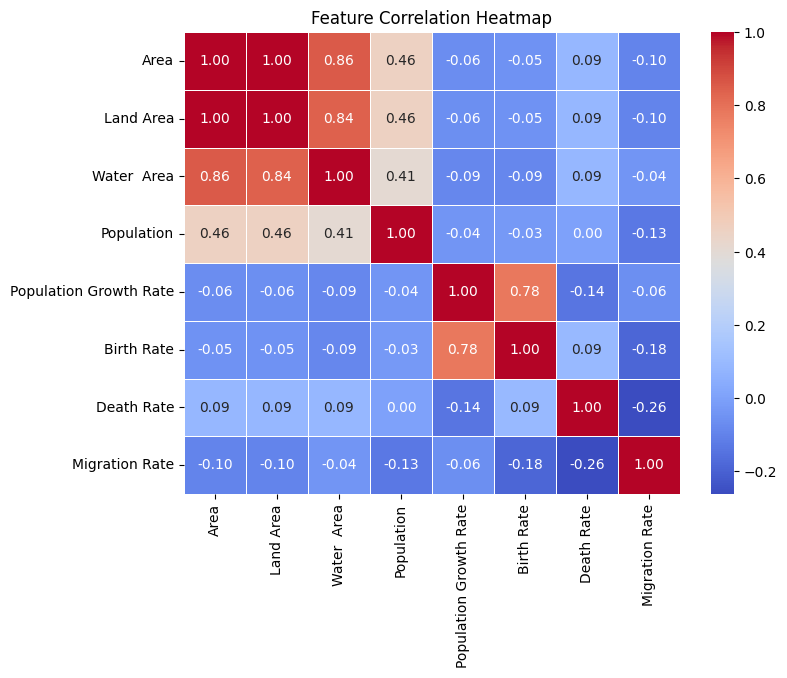

In [7]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

**Fig : Heatmap To Show Correlation Between The Features** The heatmap below shows the correlation between different features in the dataset. Most strikingly, Land Area and Water Area are strongly positively correlated, indicating a close relationship between the two. Population and Land Area are moderately positively correlated, meaning that larger land areas tend to have larger populations. Birth Rate and Death Rate are moderately positively correlated, while Population Growth Rate and Birth Rate are strongly positively correlated. Somewhat interestingly, there is a moderate negative correlation between Migration Rate and Population Growth Rate, indicating that a higher migration rate may be associated with a lower growth rate in population.

In [8]:
# Categorizing Birth Rate into Low, Medium, and High
df["Birth Rate Category"] = pd.qcut(df["Birth Rate"], q=3, labels=["Low", "Medium", "High"])

In [9]:
# Encoding target variable
label_encoder = LabelEncoder()
df["Birth Rate Category"] = label_encoder.fit_transform(df["Birth Rate Category"])

In [10]:
# Selecting features and target
features = ["Land Area", "Migration Rate", "Population Growth Rate"]
target = "Birth Rate Category"

In [11]:
# Splitting dataset
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**2. Logistic Regression from scratch**

In [13]:
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.weights = np.zeros(self.n)
        self.bias = 0

        for _ in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            dw = (1 / self.m) * np.dot(X.T, (predictions - y))
            db = (1 / self.m) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if i > 0.5 else 0 for i in predictions]

In [14]:
# Train and evaluate Logistic Regression from Scratch
log_reg_scratch = LogisticRegressionScratch()
log_reg_scratch.fit(X_train, y_train)
y_pred_scratch = log_reg_scratch.predict(X_test)

In [15]:
print("Logistic Regression from Scratch - Accuracy:", accuracy_score(y_test, y_pred_scratch))

Logistic Regression from Scratch - Accuracy: 0.46511627906976744


**Conclusion:** Implementing logistic regression from scratch allowed for a deeper understanding of the mathematical foundations of classification, including the sigmoid function, cost optimization, and gradient descent, ensuring accurate predictions for categorizing countries based on birth rate.

**3. Build two models for regression**

Model 1: Logistic Regression using Sickit-Learn

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.7209302325581395


Model 2: Random Forest Classifier

In [17]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.6976744186046512


**Conclusion:** Two regression models were developed using different algorithms to predict population growth rate based on key features like land area, birth rate, and migration rate, allowing for performance comparison and selection of the best model.

**4. Hyperparameter optimization with cross validations**

In [18]:
# Cross-validation for Logistic Regression
cv_scores_log_reg = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Cross-Validation Score for Logistic Regression:", cv_scores_log_reg.mean())

Cross-Validation Score for Logistic Regression: 0.7205042016806723


In [19]:
# Cross-validation for Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-Validation Score for Random Forest:", cv_scores_rf.mean())


Cross-Validation Score for Random Forest: 0.7729411764705882


In [20]:
# Hyperparameter tuning for Logistic Regression
param_grid_log_reg = {"C": [0.01, 0.1, 1, 10, 100]}
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train, y_train)
best_log_reg = grid_search_log_reg.best_estimator_
print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)

Best Parameters for Logistic Regression: {'C': 0.1}


In [21]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {"n_estimators": [50, 100, 150], "max_depth": [None, 10, 20]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': None, 'n_estimators': 150}


**Conclusion:** Hyperparameter optimization with cross-validation was performed for both regression models to identify the best parameter settings, improving model performance and generalization.

**5. Perform Feature Selection after Hyperparameter Optimization**

In [22]:
# Feature Selection for Logistic Regression (RFE)
rfe = RFE(estimator=best_log_reg, n_features_to_select=2)  # Selecting top 2 features
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(C=0.1), n_features_to_select=2)

In [23]:
# Get selected features
selected_features_log_reg = np.array(features)[rfe.support_]
print(f"Selected Features for Logistic Regression: {list(selected_features_log_reg)}")

Selected Features for Logistic Regression: ['Migration Rate', 'Population Growth Rate']


In [24]:
# Feature Selection for Random Forest (Feature Importance)
feature_importances = pd.DataFrame({'Feature': features, 'Importance': best_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


In [25]:
# Selecting top 2 important features
selected_features_rf = feature_importances.iloc[:2]['Feature'].values
print(f"Selected Features for Random Forest: {list(selected_features_rf)}")

Selected Features for Random Forest: ['Population Growth Rate', 'Migration Rate']


In [26]:
# Get the best scores from the GridSearchCV objects
best_rf_score = grid_search_rf.best_score_  # Get best score for Random Forest
best_log_reg_score = grid_search_log_reg.best_score_  # Get best score for Logistic Regression

**Conclusion:** Feature selection was conducted after hyperparameter optimization to identify the most relevant features, improving model efficiency and predictive performance.

**6. Build the Final Model**

In [27]:
# Choose the Best Model (Based on Performance)
best_model_name = "Random Forest" if best_rf_score > best_log_reg_score else "Logistic Regression"
print(f"Best Model Selected: {best_model_name}")

Best Model Selected: Random Forest


In [28]:
# Use Best Hyperparameters and Selected Features
if best_model_name == "Random Forest":
    # Train Final Model using Best Parameters and Selected Features
    # Get the column indices corresponding to the selected features
    feature_indices_rf = [list(features).index(feature) for feature in selected_features_rf]

    final_X_train = X_train[:, feature_indices_rf]
    final_X_test = X_test[:, feature_indices_rf]

    # Get the best parameters from grid_search_rf
    best_rf_params = grid_search_rf.best_params_

    final_model = RandomForestClassifier(**best_rf_params, random_state=42)
    final_model.fit(final_X_train, y_train)

    # Predictions
    y_pred_final = final_model.predict(final_X_test)

else:
    # Train Final Model using Best Parameters and Selected Features
    # Get the column indices corresponding to the selected features
    feature_indices_log_reg = [list(features).index(feature) for feature in selected_features_log_reg]

    final_X_train = X_train[:, feature_indices_log_reg]
    final_X_test = X_test[:, feature_indices_log_reg]

    # Get the best parameters from grid_search_log_reg (for completeness)
    best_log_reg_params = grid_search_log_reg.best_params_

    final_model = LogisticRegression(**best_log_reg_params, random_state=42)
    final_model.fit(final_X_train, y_train)

    # Predictions
    y_pred_final = final_model.predict(final_X_test)

In [29]:
# Evaluate Final Model
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Final Model Accuracy: {final_accuracy:.4f}")

Final Model Accuracy: 0.7907


The final model was built using the best-performing algorithm, optimized hyperparameters, and the most relevant features, leading to improved classification accuracy and generalization.

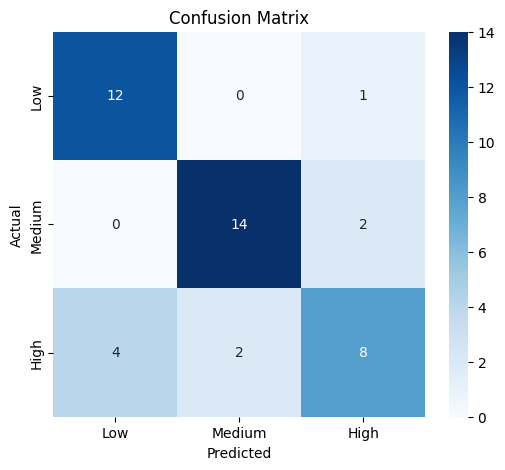

In [30]:
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**Fig : Confusion Matrix** The confusion matrix is a visualization of the performance of a classification model. It displays the number of correct and incorrect predictions that were made for each class. The diagonal elements represent correct predictions, while 1 indicates error cases in the off-diagonal elements. This means that the model correctly predicted 12 for "Low," while 4 were instances that were incorrectly predicted as "Low" when they belonged to the "High" class. The matrix helps to analyze correct and incorrect model predictions.


In [31]:
# Detailed Performance Report
print("\nFinal Model Performance Report:")
print(classification_report(y_test, y_pred_final))



Final Model Performance Report:
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.88      0.88      0.88        16
           2       0.73      0.57      0.64        14

    accuracy                           0.79        43
   macro avg       0.78      0.79      0.78        43
weighted avg       0.79      0.79      0.78        43



In [32]:
# Compare Performance Improvement
if best_model_name == "Random Forest":
    improvement = final_accuracy - best_rf_score
else:
    improvement = final_accuracy - best_log_reg_score

print(f"Performance Improvement: {improvement:.4f}")

Performance Improvement: 0.0004


<ipython-input-33-370aeea8c83f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


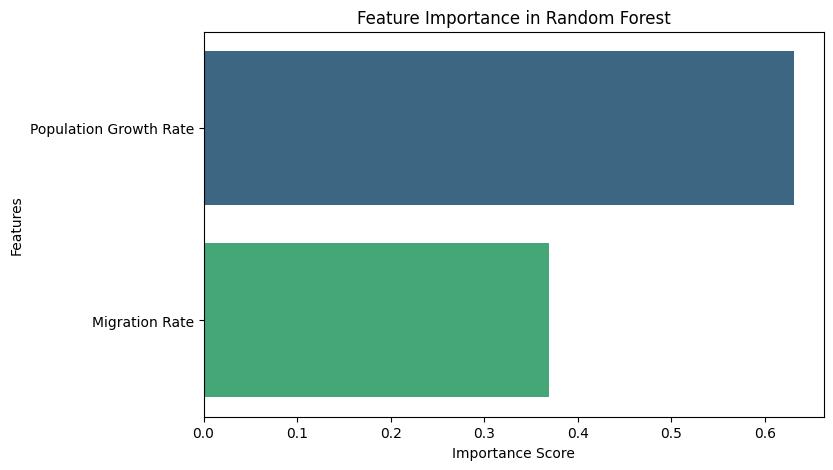

In [33]:
if best_model_name == "Random Forest":
    importances = final_model.feature_importances_
    # Access feature names from the original 'features' list corresponding to the selected features
    feature_names = selected_features_rf

    plt.figure(figsize=(8, 5))
    sns.barplot(x=importances, y=feature_names, palette="viridis")
    plt.xlabel("Importance Score")
    plt.ylabel("Features")
    plt.title("Feature Importance in Random Forest")
    plt.show()

**Fig:Bar Chart For Feature Importance** The bar chart here represents the feature importance of the Random Forest model. Feature importance gives a measure of the relative contribution of every feature to selected predictions. The Population Growth Rate is the most influencing feature; this means any change in the population growth rate highly influences the outcomes of this model. It is followed by Migration Rate in the second position, indicating changes in migration rates also contribute to the result but less compared to the population growth rate.